# Analysis of words in summaries to determine character actions [Work in progress]

In [1]:
import pickle

import nltk
import pandas as pd
from nltk.corpus import stopwords
from tqdm import tqdm # Progress bar

from fuzzywuzzy import process
from nltk.tokenize import word_tokenize

In [2]:
## Uncomment cell on first run
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maximilianwettstein/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data=pd.read_csv('DATA/movie_data.csv')

In [4]:
## Subset of data to test the model
data_test=data.head(100)

In [5]:
data_test

,IMDB_ID,wikipedia_ID,freebase_ID,box_office_revenue,runtime,name,release_date,genre,plot_summary
0,tt0228333,975900.0,/m/03vyhn,14010832.0,98.0,Ghosts of Mars,2001.0,"['Thriller', 'Adventure', 'Horror', 'Action', ...","Set in the second half of the 22nd century, th..."
1,tt0245916,3196793.0,/m/08yl5d,NaN,95.0,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,"['Biography', 'Drama', 'Mystery']",NaN
2,tt0002894,13696889.0,/m/03cfc81,NaN,35.0,The Gangsters,1913.0,"['Comedy', 'Indie']",NaN
3,tt0029852,10408933.0,/m/02qc0j7,3600000.0,106.0,Alexander's Ragtime Band,1938.0,"['Musical', 'Comedy']",NaN
4,tt0021335,175026.0,/m/017n1p,NaN,86.0,Sarah and Son,1930.0,['Drama'],NaN
...,...,...,...,...,...,...,...,...,...
95,tt0065825,27365295.0,/m/0bb_l75,NaN,95.0,Hell Boats,1970.0,['Adventure'],"In 1941 Lt. Commander Jeffords, an American se..."
96,tt0865556,6703617.0,/m/0gj6pd,127906624.0,105.0,The Forbidden Kingdom,2008.0,"['Action', 'Romance Film', 'Fantasy', 'Adventu...","In this film, which is based loosely on the an..."
97,tt0427342,14294670.0,/m/03c_p7d,NaN,92.0,Heart of the Storm,2004.0,"['Psychological thriller', 'Thriller']",NaN
98,tt0019466,22466518.0,/m/05zp19b,NaN,19.0,There It Is,1928.0,[],NaN


In [6]:
token=nltk.word_tokenize(data_test.plot_summary[0])
token

['Set',
 'in',
 'the',
 'second',
 'half',
 'of',
 'the',
 '22nd',
 'century',
 ',',
 'the',
 'film',
 'depicts',
 'Mars',
 'as',
 'a',
 'planet',
 'that',
 'has',
 'been',
 '84',
 '%',
 'terraformed',
 ',',
 'allowing',
 'humans',
 'to',
 'walk',
 'on',
 'the',
 'surface',
 'without',
 'wearing',
 'pressure',
 'suits',
 '.',
 'The',
 'Martian',
 'society',
 'has',
 'become',
 'largely',
 'matriarchal',
 ',',
 'with',
 'women',
 'in',
 'most',
 'positions',
 'of',
 'authority',
 '.',
 'The',
 'story',
 'concerns',
 'a',
 'police',
 'officer',
 ',',
 'Melanie',
 'Ballard',
 ',',
 'second',
 'in',
 'command',
 'of',
 'a',
 'small',
 'team',
 'alongside',
 'Sergeant',
 'Jericho',
 'sent',
 'to',
 'pick',
 'up',
 'and',
 'transport',
 'a',
 'prisoner',
 'named',
 'Desolation',
 'Williams',
 '.',
 'Arriving',
 'at',
 'the',
 'remote',
 'mining',
 'town',
 'where',
 'Williams',
 'is',
 'being',
 'held',
 ',',
 'Ballard',
 'finds',
 'virtually',
 'all',
 'of',
 'the',
 'people',
 'missing',
 

In [7]:
tagged_tokens = nltk.pos_tag(token)
tagged_tokens

[('Set', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('second', 'JJ'),
 ('half', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('22nd', 'JJ'),
 ('century', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('film', 'NN'),
 ('depicts', 'VBZ'),
 ('Mars', 'NNP'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('planet', 'NN'),
 ('that', 'WDT'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('84', 'CD'),
 ('%', 'NN'),
 ('terraformed', 'VBN'),
 (',', ','),
 ('allowing', 'VBG'),
 ('humans', 'NNS'),
 ('to', 'TO'),
 ('walk', 'VB'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('surface', 'NN'),
 ('without', 'IN'),
 ('wearing', 'VBG'),
 ('pressure', 'NN'),
 ('suits', 'NNS'),
 ('.', '.'),
 ('The', 'DT'),
 ('Martian', 'JJ'),
 ('society', 'NN'),
 ('has', 'VBZ'),
 ('become', 'VBN'),
 ('largely', 'RB'),
 ('matriarchal', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('women', 'NNS'),
 ('in', 'IN'),
 ('most', 'JJS'),
 ('positions', 'NNS'),
 ('of', 'IN'),
 ('authority', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('story', 'NN'),
 ('concerns', 'VBZ'),
 ('a', 'DT'),
 ('police', 'NN

In [8]:
chunks=nltk.ne_chunk(tagged_tokens)

In [9]:
chunks[2][1]

'DT'

In [10]:
for chunk in chunks:
    print(chunk)

(GPE Set/NN)
('in', 'IN')
('the', 'DT')
('second', 'JJ')
('half', 'NN')
('of', 'IN')
('the', 'DT')
('22nd', 'JJ')
('century', 'NN')
(',', ',')
('the', 'DT')
('film', 'NN')
('depicts', 'VBZ')
(PERSON Mars/NNP)
('as', 'IN')
('a', 'DT')
('planet', 'NN')
('that', 'WDT')
('has', 'VBZ')
('been', 'VBN')
('84', 'CD')
('%', 'NN')
('terraformed', 'VBN')
(',', ',')
('allowing', 'VBG')
('humans', 'NNS')
('to', 'TO')
('walk', 'VB')
('on', 'IN')
('the', 'DT')
('surface', 'NN')
('without', 'IN')
('wearing', 'VBG')
('pressure', 'NN')
('suits', 'NNS')
('.', '.')
('The', 'DT')
(GPE Martian/JJ)
('society', 'NN')
('has', 'VBZ')
('become', 'VBN')
('largely', 'RB')
('matriarchal', 'JJ')
(',', ',')
('with', 'IN')
('women', 'NNS')
('in', 'IN')
('most', 'JJS')
('positions', 'NNS')
('of', 'IN')
('authority', 'NN')
('.', '.')
('The', 'DT')
('story', 'NN')
('concerns', 'VBZ')
('a', 'DT')
('police', 'NN')
('officer', 'NN')
(',', ',')
(PERSON Melanie/NNP Ballard/NNP)
(',', ',')
('second', 'JJ')
('in', 'IN')
('comma

The list of all the abbreviations https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
The verbs are given by :
- VB
- VBD
- VBG
- VBN
- VBP
- VBZ

The adjectives are given by :

- JJ
- JJR
- JJS

The nouns are given by:
- NN
- NNS
- NNP
- NNPS

In [11]:
verb_tags=['VB','VBD','VBG','VBN','VBP','VBZ']
adj_tags=['JJ','JJR','JJS']
noun_tags=['NN','NNS','NNP','NNPS']

## Pipeline to extract verbs, adjectives and nouns from the plot summary

As stopwords appear very frequently in the text they mask the important words. We therefore remove them from the text.

# Once this function is finalized move it to helpers.py file (and comment it correctly)

In [12]:
def extract_words(df, from_col, to_extract):
    tokens = pd.Series()
    tagged_tokens = []
    chunks_array = []
    verbs_list = []
    adjs_list = []
    nouns_list = []
    stop_words = set(stopwords.words('english'))

    # Create tqdm progress bar for the loop
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Movies"):
        verbs = []
        adjs = []
        nouns = []
        summary = row[to_extract] # not necessarily extract from summary so change this variable name
        movie_id = row[from_col] # we may want to extract from another column than movie ID so change the name as well

        if type(summary) == str:  # To only keep movies with a summary (ignoring NaN)
            token = [word for word in nltk.word_tokenize(summary) if word.lower() not in stop_words]  # Removing stopwords
            tokens[movie_id] = token
            tagged_tokens.append((movie_id, nltk.pos_tag(token)))

    # Tqdm progress bar for the second loop
    for movie_id, tagged_token in tqdm(tagged_tokens, desc="Processing Tokens", leave=False):
        chunks_array.append((movie_id, nltk.ne_chunk(tagged_token)))

        verbs = []
        adjs = []
        nouns = []

        # Categorize
        for word, pos_tag in tagged_token:
            if pos_tag in verb_tags: # modified to not have movie-id all the time
                verbs.append(word)
            elif pos_tag in adj_tags:
                adjs.append(word)
            elif pos_tag in noun_tags:
                nouns.append(word)

        verbs_list.append((movie_id, verbs))
        adjs_list.append((movie_id, adjs))
        nouns_list.append((movie_id, nouns))

    # Returns lists of all verbs, adjectives, and nouns for each movie and raw chunks for each movie
    return verbs_list, adjs_list, nouns_list, chunks_array

In [13]:
def extract_words_new(df):
    tokens = pd.Series()
    tagged_tokens = []
    chunks_array = []
    verbs_list = []
    adjs_list = []
    nouns_list = []
    stop_words = set(stopwords.words('english'))

    # Create tqdm progress bar for the loop
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing Movies"):
        verbs = []
        adjs = []
        nouns = []
        summary = row["plot_summary"] # not necessarily extract from summary so change this variable name
        movie_id = row["IMDB_ID"] # we may want to extract from another column than movie ID so change the name as well

        if type(summary) == str:  # To only keep movies with a summary (ignoring NaN)
            token = [word for word in nltk.word_tokenize(summary) if word.lower() not in stop_words]  # Removing stopwords
            tokens[movie_id] = token
            tagged_tokens.append((movie_id, nltk.pos_tag(token)))

    # Tqdm progress bar for the second loop
    for movie_id, tagged_token in tqdm(tagged_tokens, desc="Processing Tokens", leave=False):
        chunks_array.append((movie_id, nltk.ne_chunk(tagged_token)))

        verbs = []
        adjs = []
        nouns = []

        # Categorize
        for word, pos_tag in tagged_token:
            if pos_tag in verb_tags: # modified to not have movie-id all the time
                verbs.append(word)
            elif pos_tag in adj_tags:
                adjs.append(word)
            elif pos_tag in noun_tags:
                nouns.append(word)

        verbs_list.append((movie_id, verbs))
        adjs_list.append((movie_id, adjs))
        nouns_list.append((movie_id, nouns))

    # Returns lists of all verbs, adjectives, and nouns for each movie and raw chunks for each movie
    return verbs_list, adjs_list, nouns_list, chunks_array

### Testing code on full dataset

In [14]:
# Takes some time to run (~30min) , results are saved as dataframes in the variables below and exported as csv & pickle files
verbs, adjs, nouns, chunks = extract_words(data_test, "IMDB_ID", "plot_summary")

Processing Movies: 100%|██████████| 100/100 [00:00<00:00, 158.31it/s]


In [15]:
# Create DataFrames from the lists
verbs_df = pd.DataFrame(verbs, columns=['IMDB_ID', 'Verbs'])
adjs_df = pd.DataFrame(adjs, columns=['IMDB_ID', 'Adjectives'])
nouns_df = pd.DataFrame(nouns, columns=['IMDB_ID', 'Nouns'])
chunks_df = pd.DataFrame(chunks, columns=['IMDB_ID', 'Chunks'])

# Merge the DataFrames on 'IMDB_ID'
merged_df = verbs_df.merge(adjs_df).merge(nouns_df).merge(chunks_df)

In [16]:
merged_df

,IMDB_ID,Verbs,Adjectives,Nouns,Chunks
0,tt0228333,"[planet, terraformed, allowing, walk, wearing,...","[second, 22nd, Martian, matriarchal, police, s...","[Set, half, century, film, depicts, Mars, %, h...","[[(Set, NNP)], (second, JJ), (half, NN), (22nd..."
1,tt0119548,"[works, committing, wants, take, gotten, left,...","[Francisco-based, cab, hard, next, ex-girlfrie...","[Adam, San, artist, driver, side, time, girlfr...","[[(Adam, NNP)], (,, ,), [(San, NNP)], (Francis..."
2,tt0058331,"[opens, perched, died, descends, performing, w...","[cloud, high, grand, one-man, good, exterior, ...","[film, Mary, Poppins, London, spring, Englishm...","[(film, NN), (opens, VBZ), [(Mary, NNP), (Popp..."
3,tt0892904,"[growing, getting, mooching, enjoys, dodges, g...","[[, Forty-year-old, least, older, upper, 10-ye...","[Jimmy, bunk, nephew, bed, generosity, sister,...","[([, JJ), (``, ``), (Forty-year-old, JJ), (Jim..."
4,tt0255819,"[named, lives, amg, seem, becoming, named, mov...","[young, mother, unemployed, best, interested, ...","[Jody, Juanita, movie, South, Central, Los, An...","[(young, JJ), (20-year-old, CD), (named, VBN),..."
5,tt0088157,"[makes, based, committed, making, casting, fin...","[megalomaniacal, young, would-be, dead, dead, ...","[[, director, movie, murder, Reality, illusion...","[([, NN), (', ''), (director, NN), (makes, VBZ..."
6,tt0099054,"[graduating, become, getting, move, returns, e...","[fifteen, successful, ready, big, high, early,...","[Archie, Andrews, years, Riverdale, High, lawy...","[[(Archie, NNP)], [(Andrews, NNP)], (,, ,), (f..."
7,tt0482499,"[chronicles, centered, band, go, drums, set, m...","[famous, 'Electric, Spinal, assumed, forth, do...","[[, graduate, filmmaker, jam, band, journey, m...","[([, NN), (``, ``), (graduate, NN), (filmmaker..."
8,tt0153301,"[comes, opening, filmed, suspects, suspects, b...","[comedic, spoofs, Imperial, guilty, small, vis...","[example, film, tone, monologue, opening, COPS...","[(example, NN), (film, NN), ('s, POS), (comedi..."
9,tt0166158,"[help, jailed, reunites, travel, irritates]","[jealous, attempted, older, previous]","[Ruby, Claude, Montgomery, insecure, couple, C...","[[(Ruby, NNP)], [(Claude, NNP), (Montgomery, N..."


In [17]:
# Export the DataFrames as csv files
merged_df.to_csv('DATA/words.csv', index=False)

In [18]:
# Export the DataFrames as pickle files
merged_df.to_pickle('pickles/words.pickle')

The outputs (pickle and csv) can be downloaded at https://drive.switch.ch/index.php/s/U5ntGAtMkXWi9yn. They are not pushed onto the repository as they are too large (>100MB)

In [19]:
# Import datafrom pickle file
merged_df = pd.read_pickle('pickles/words.pickle')

## Assigning genders to characters

In [20]:
# Load the datasets
characters_data=pd.read_csv('DATA/characters_data.csv',low_memory=False)
movie_data=pd.read_csv('DATA/movie_data.csv',low_memory=False)

In [21]:
characters_data

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0
336455,336456,NaN,NaN,NaN,joshua bootz,NaN,tt9914522,Evan's dad,M,NaN,The Holden Family Plan,2019.0,NaN
336456,336457,NaN,NaN,NaN,vince camaj,NaN,tt9914522,Todd,M,NaN,The Holden Family Plan,2019.0,NaN


In [22]:
movie_data

,IMDB_ID,wikipedia_ID,freebase_ID,box_office_revenue,runtime,name,release_date,genre,plot_summary
0,tt0228333,975900.0,/m/03vyhn,14010832.0,98.0,Ghosts of Mars,2001.0,"['Thriller', 'Adventure', 'Horror', 'Action', ...","Set in the second half of the 22nd century, th..."
1,tt0245916,3196793.0,/m/08yl5d,NaN,95.0,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,"['Biography', 'Drama', 'Mystery']",NaN
2,tt0002894,13696889.0,/m/03cfc81,NaN,35.0,The Gangsters,1913.0,"['Comedy', 'Indie']",NaN
3,tt0029852,10408933.0,/m/02qc0j7,3600000.0,106.0,Alexander's Ragtime Band,1938.0,"['Musical', 'Comedy']",NaN
4,tt0021335,175026.0,/m/017n1p,NaN,86.0,Sarah and Son,1930.0,['Drama'],NaN
...,...,...,...,...,...,...,...,...,...
53607,tt9913056,NaN,NaN,NaN,NaN,Swarm Season,2019.0,[],"[""On the remote volcanic island of Hawaii, 10-..."
53608,tt9913288,NaN,NaN,NaN,NaN,Letters,2020.0,[],"[""Charlie Porter is an ordinary man. He leads ..."
53609,tt9914522,NaN,NaN,NaN,NaN,The Holden Family Plan,2019.0,[],"[""When Mackenzie Holden's sister and brother i..."
53610,tt9914582,NaN,NaN,NaN,NaN,However Long,2019.0,[],['Documentary following four women with incura...


In [23]:
# Count number of nans in gender column
missing_gender_percentage = 100 * characters_data['actor_gender'].isna().sum() / len(characters_data.index)
print(f"Number of missing genders: {missing_gender_percentage:.2f}%")

Number of missing genders: 4.55%


The number of missing genders is reasonable, it is therefore not necessary to predict them for the rest of the analysis. If it later comes out that this is required packages such as gender-guesser (https://pypi.org/project/gender-guesser/) can be used

In [24]:
# Count number of nans in character name column
missing_names_percentage = 100 * characters_data['character_name'].isna().sum() / len(characters_data.index)
print(f"Number of missing character names: {missing_names_percentage:.2f}%")

Number of missing character names: 24.30%


The number of missing character's name is close to 25% so we will be able to perform our analysis only on 75% of the characters in our analysis.

In [25]:
# drop the characters with missing character names and actors gender so we can determine if characters are F/M
characters_noNA = characters_data.dropna(subset=["character_name", "actor_gender"])
characters_noNA

,character_ID,wikipedia_ID,freebase_ID,actor_ethnicity,actor_name,personnas,IMDB_ID,character_name,actor_gender,box_office_revenue,name,release_date,actor_age
0,1,975900.0,/m/03vyhn,NaN,wanda de jesus,NaN,tt0228333,Akooshay,F,NaN,Ghosts of Mars,2001.0,42.0
1,2,975900.0,/m/03vyhn,/m/044038p,natasha henstridge,NaN,tt0228333,Lieutenant Melanie Ballard,F,14010832.0,Ghosts of Mars,2001.0,27.0
2,3,975900.0,/m/03vyhn,/m/0x67,ice cube,NaN,tt0228333,Desolation Williams,M,14010832.0,Ghosts of Mars,2001.0,32.0
3,4,975900.0,/m/03vyhn,NaN,jason statham,NaN,tt0228333,Sgt Jericho Butler,M,14010832.0,Ghosts of Mars,2001.0,34.0
4,5,975900.0,/m/03vyhn,NaN,clea duvall,NaN,tt0228333,Bashira Kincaid,F,NaN,Ghosts of Mars,2001.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336453,336454,NaN,NaN,NaN,caleb silvers,NaN,tt9914522,Evan,M,NaN,The Holden Family Plan,2019.0,24.0
336454,336455,NaN,NaN,NaN,bethany hazelitt,NaN,tt9914522,Mackenzie,F,NaN,The Holden Family Plan,2019.0,29.0
336455,336456,NaN,NaN,NaN,joshua bootz,NaN,tt9914522,Evan's dad,M,NaN,The Holden Family Plan,2019.0,NaN
336456,336457,NaN,NaN,NaN,vince camaj,NaN,tt9914522,Todd,M,NaN,The Holden Family Plan,2019.0,NaN


In [26]:
# drop movies with missing summaries 
movie_noNA = movie_data.dropna(subset=["plot_summary"])
movie_noNA

,IMDB_ID,wikipedia_ID,freebase_ID,box_office_revenue,runtime,name,release_date,genre,plot_summary
0,tt0228333,975900.0,/m/03vyhn,14010832.0,98.0,Ghosts of Mars,2001.0,"['Thriller', 'Adventure', 'Horror', 'Action', ...","Set in the second half of the 22nd century, th..."
5,tt0119548,6631279.0,/m/0gffwj,NaN,93.0,Little city,1997.0,"['Comedy', 'Romance Film', 'Drama', 'Romantic ...","Adam, a San Francisco-based artist who works a..."
6,tt0058331,77856.0,/m/0kcn7,102272727.0,139.0,Mary Poppins,1964.0,"['Musical', ""Children's/Family"", 'Drama', 'Com...",The film opens with Mary Poppins perched in a...
10,tt0892904,21926710.0,/m/05p45cv,NaN,82.0,White on Rice,2009.0,[],"[""Forty-year-old Jimmy is growing up--or at le..."
12,tt0255819,156558.0,/m/014k4y,29381649.0,123.0,Baby Boy,2001.0,"['Drama', 'Coming of age']",A young 20-year-old named Jody lives with his...
...,...,...,...,...,...,...,...,...,...
53607,tt9913056,NaN,NaN,NaN,NaN,Swarm Season,2019.0,[],"[""On the remote volcanic island of Hawaii, 10-..."
53608,tt9913288,NaN,NaN,NaN,NaN,Letters,2020.0,[],"[""Charlie Porter is an ordinary man. He leads ..."
53609,tt9914522,NaN,NaN,NaN,NaN,The Holden Family Plan,2019.0,[],"[""When Mackenzie Holden's sister and brother i..."
53610,tt9914582,NaN,NaN,NaN,NaN,However Long,2019.0,[],['Documentary following four women with incura...


In [27]:
# List of movies that we will use in the analysis - must have summary, character name and gender
pers_data = movie_data[movie_data.IMDB_ID.isin(characters_data.IMDB_ID)]
pers_data = pers_data.dropna(subset=["plot_summary"])
pers_data

,IMDB_ID,wikipedia_ID,freebase_ID,box_office_revenue,runtime,name,release_date,genre,plot_summary
0,tt0228333,975900.0,/m/03vyhn,14010832.0,98.0,Ghosts of Mars,2001.0,"['Thriller', 'Adventure', 'Horror', 'Action', ...","Set in the second half of the 22nd century, th..."
5,tt0119548,6631279.0,/m/0gffwj,NaN,93.0,Little city,1997.0,"['Comedy', 'Romance Film', 'Drama', 'Romantic ...","Adam, a San Francisco-based artist who works a..."
6,tt0058331,77856.0,/m/0kcn7,102272727.0,139.0,Mary Poppins,1964.0,"['Musical', ""Children's/Family"", 'Drama', 'Com...",The film opens with Mary Poppins perched in a...
10,tt0892904,21926710.0,/m/05p45cv,NaN,82.0,White on Rice,2009.0,[],"[""Forty-year-old Jimmy is growing up--or at le..."
12,tt0255819,156558.0,/m/014k4y,29381649.0,123.0,Baby Boy,2001.0,"['Drama', 'Coming of age']",A young 20-year-old named Jody lives with his...
...,...,...,...,...,...,...,...,...,...
53602,tt9908448,NaN,NaN,NaN,NaN,The Bells of Hell,2018.0,[],['An alcoholic newlywed wife spends three days...
53603,tt9908592,NaN,NaN,NaN,NaN,Filmmakers Unite (FU),2017.0,[],"['Curated by Jay Rosenblatt and Ellen Bruno, F..."
53605,tt9910648,NaN,NaN,NaN,NaN,"The Good Americans: One Revolution, Two Nations",2021.0,[],['Størmerlige Films is making a feature-length...
53608,tt9913288,NaN,NaN,NaN,NaN,Letters,2020.0,[],"[""Charlie Porter is an ordinary man. He leads ..."


## From the summary, extract the characters that appear and matches them with the character_data and associate the gender of the actor

In [28]:
def find_characters_genders_for_all_movies(movies_df, characters_df): # modify so you also return the full list of character names so that no need to redo fuzzy wory!
    """
    Finds the gender of characters for all movies in a dataframe
    :param movies_df: pandas dataframe with movie information
    :param characters_df: pandas dataframe with character information
    :return result_df: pandas dataframe with IMDb ID, summary, and characters' genders for all movies
    """
    all_results = []

    for _, movie_row in tqdm(movies_df.iterrows(), total=len(movies_df), desc="Processing Movies"):
        # Check if the 'plot_summary' is a non-NaN value
        if pd.notna(movie_row['plot_summary']):
            IMDB_ID_character_list = characters_df.loc[characters_df['IMDB_ID'] == movie_row['IMDB_ID']]

            genders = []
            characters = []
            summary_words = [word for word in word_tokenize(movie_row['plot_summary'].lower()) if word.isalnum()]  # Tokenize and exclude non-alphanumeric characters

            # Set to keep track of already matched characters for the current movie and summary
            matched_characters = set()

            for word in summary_words:
                closest_character, confidence, score = process.extractOne(word, IMDB_ID_character_list['character_name'])

                if confidence > 50 and closest_character:  # Check confidence and non-empty character
                    # Check if the character has already been matched for the current movie and summary
                    if closest_character not in matched_characters:
                        gender = IMDB_ID_character_list.loc[IMDB_ID_character_list['character_name'] == closest_character, 'actor_gender'].values
                        if len(gender) > 0:
                            characters.append(closest_character)
                            genders.append(gender[0])

                        # Add the matched character to the set for the current movie and summary
                        matched_characters.add(closest_character)

            result_df = pd.DataFrame({
                'IMDB_ID': [movie_row['IMDB_ID']] * len(characters),
                'plot_summary': [movie_row['plot_summary']] * len(characters),
                'character_name': characters,
                'gender': genders
            })

            all_results.append(result_df)

    result_df = pd.concat(all_results, ignore_index=True)
    return result_df

In [29]:
# Assuming you have your movie dataset stored in 'movies_df'
# and characters dataset in 'characters_df'

result_df = find_characters_genders_for_all_movies(pers_data.head(10), characters_data)

# Print or use result_df as needed
display(result_df.head(20))


Processing Movies: 100%|██████████| 10/10 [00:02<00:00,  4.97it/s]


,IMDB_ID,plot_summary,character_name,gender
0,tt0228333,"Set in the second half of the 22nd century, th...",Sgt Jericho Butler,M
1,tt0228333,"Set in the second half of the 22nd century, th...",Bashira Kincaid,F
2,tt0228333,"Set in the second half of the 22nd century, th...",Michael Descanso,M
3,tt0228333,"Set in the second half of the 22nd century, th...",Big Daddy Mars,M
4,tt0228333,"Set in the second half of the 22nd century, th...",Akooshay,F
5,tt0228333,"Set in the second half of the 22nd century, th...",Lieutenant Melanie Ballard,F
6,tt0228333,"Set in the second half of the 22nd century, th...",Commander Helena Braddock,F
7,tt0228333,"Set in the second half of the 22nd century, th...",Desolation Williams,M
8,tt0228333,"Set in the second half of the 22nd century, th...",Whitlock,F
9,tt0228333,"Set in the second half of the 22nd century, th...",Tres,M


In [30]:
# Assuming 'result_df' is the output of your function
count_gender = result_df['gender'].value_counts().to_dict()

print(
    "There are only {} movies left and with {} male characters and {} female characters.".format(
        len(result_df['IMDB_ID'].unique()), count_gender.get("M", 0), count_gender.get("F", 0)
    )
)


There are only 10 movies left and with 43 male characters and 33 female characters.


## To do list
- modify find_characters_genders_for_all_movies so it returns, in addition to what it already retrun, the full list of character names without exact duplicates 
- look at the git from last year to see how to adapt their code of getting words to out code. For that to avoid using fuzzy wozzy again we need to use the second dataset that is returned by find_characters_genders_for_all_movies once modified 

## Now "scans" each summary for each character (perfect match or not) and associate them the previous and folllowing 3 words in the summmary, these words will be analyzed later on).

In [31]:
def extract_context_strings(result_df):
    """
    Extracts context strings for each character in the DataFrame
    :param result_df: pandas dataframe with IMDb ID, summary, characters, and genders
    :return result_df_with_context: pandas dataframe with IMDb ID, summary, characters, genders, and context strings
    """
    result_df_with_context = result_df.copy()
    stop_words = set(stopwords.words('english'))
    # remove the stopwords to not extract them
    result_df_with_context['plot_summary'] = result_df_with_context['plot_summary'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    result_df_with_context['associated_words'] = ""

    for _, row in tqdm(result_df_with_context.iterrows(), total=len(result_df_with_context), desc="Extracting Context Strings"):
        character = row['character_name']
        summary_words = [word for word in word_tokenize(row['plot_summary']) if word.isalnum()]

        # Use fuzzy matching to find occurrences of the character name in the summary (non exact matches will also be found)
        occurrences = [i for i, word in enumerate(summary_words) if process.extractOne(word, [character])[1] > 50]

        # Extract context strings for each occurrence, 2 words before and 2 words after
        context_strings = []
        for occurrence in occurrences:
            start_index = max(0, occurrence - 3)
            end_index = min(len(summary_words), occurrence + 4)

            # Exclude the matched word from the context string
            matched_word = summary_words[occurrence]
            context_string = " ".join(summary_words[start_index:end_index])
            context_string = context_string.replace(matched_word, "")  # Remove the matched word
            context_strings.append(context_string.strip())  # Strip leading and trailing spaces
        
        # Concatenate context strings if there are multiple occurrences for the same character name
        if len(context_strings) > 1:
            context_string = " ".join(context_strings)
        elif len(context_strings) == 1:
            context_string = context_strings[0]
        else:
            context_string = ""

        result_df_with_context.at[_, 'associated_words'] = context_string

    return result_df_with_context

In [32]:
# Call the new function to extract context strings
result_df_with_context = extract_context_strings(result_df)

# Display the result
display(result_df_with_context)

Extracting Context Strings: 100%|██████████| 91/91 [00:01<00:00, 63.01it/s]


,IMDB_ID,plot_summary,character_name,gender,associated_words
0,tt0228333,"Set second half 22nd century, film depicts Mar...",Sgt Jericho Butler,M,second half 22nd humans walk surface wearing ...
1,tt0228333,"Set second half 22nd century, film depicts Mar...",Bashira Kincaid,F,pick transport prisoner Desolation Williams A...
2,tt0228333,"Set second half 22nd century, film depicts Mar...",Michael Descanso,M,Set second 22nd century film 22nd century fil...
3,tt0228333,"Set second half 22nd century, film depicts Mar...",Big Daddy Mars,M,century film depicts planet 84 terraformed
4,tt0228333,"Set second half 22nd century, film depicts Mar...",Akooshay,F,Set second 22nd century film miners discovere...
...,...,...,...,...,...
86,tt0166158,Ruby Claude Montgomery insecure jealous couple...,Claude Montgomery,M,Ruby Montgomery insecure jealous Ruby Claude ...
87,tt0166158,Ruby Claude Montgomery insecure jealous couple...,Lawrence Bowen,M,must help Claude Hazel jailed attempted Ruby ...
88,tt0166158,Ruby Claude Montgomery insecure jealous couple...,Rose,F,Claude Montgomery insecure couple must help R...
89,tt0166158,Ruby Claude Montgomery insecure jealous couple...,Hazel Montgomery,M,Ruby Claude insecure jealous couple help Clau...


In [33]:
context = result_df_with_context.iloc[-1]['associated_words']
print(context)

Ruby Rose mother  continuously talks Rose


In [34]:
summary = result_df_with_context.iloc[-1]['plot_summary']
print(summary)

Ruby Claude Montgomery insecure jealous couple, must help Claude's Uncle Hazel jailed attempted murder. Arkansan family reunites travel Ruby's older sister Rose, Claude previous relationship, Ruby Rose's mother Jewel, continuously talks Rose Claude's past relationship, irritates Ruby.


## Last step, take the words extracted at the previous step and classify them into verbs nouns and adjectives, and depending on the actor's gender, append them to the designated dictionnary

In [35]:
verbs, adjs, nouns, chunks = extract_words(result_df_with_context, "character_name","associated_words")

Processing Movies: 100%|██████████| 91/91 [00:00<00:00, 190.67it/s]


In [36]:
# Create DataFrames from the lists
verbs_df = pd.DataFrame(verbs, columns=['character_name', 'Verbs'])
adjs_df = pd.DataFrame(adjs, columns=['character_name', 'Adjectives'])
nouns_df = pd.DataFrame(nouns, columns=['character_name', 'Nouns'])
chunks_df = pd.DataFrame(chunks, columns=['character_name', 'Chunks'])

# Merge the DataFrames on 'IMDB_ID'
merged_df_personas = verbs_df.merge(adjs_df).merge(nouns_df).merge(chunks_df)

In [37]:
merged_df_personas

,character_name,Verbs,Adjectives,Nouns,Chunks
0,Sgt Jericho Butler,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans..."
1,Bashira Kincaid,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, Desolation, Willia...","[(pick, NN), (transport, NN), (prisoner, NN), ..."
2,Michael Descanso,"[planet, finds, missing, discovered, discovere...","[second, 22nd, 22nd, doorway, ancient, Martian...","[Set, century, film, century, film, Mars, mini...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
3,Big Daddy Mars,"[planet, terraformed]",[],"[century, film, depicts]","[(century, NN), (film, NN), (depicts, NNS), (p..."
4,Akooshay,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[Set, century, film, miners, Martian, miners, ...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
...,...,...,...,...,...
86,Claude Montgomery,"[help, jailed, travel]","[jealous, jealous, couple, older, previous]","[Ruby, Montgomery, insecure, Ruby, Claude, ins...","[[(Ruby, NNP)], [(Montgomery, NNP)], (insecure..."
87,Lawrence Bowen,"[help, jailed, Rose]",[attempted],"[Claude, Hazel, Ruby, Rose, mother, talks]","[(must, MD), (help, VB), [(Claude, NNP), (Haze..."
88,Rose,"[help, talks]","[older, previous, previous]","[Claude, Montgomery, insecure, couple, Ruby, s...","[[(Claude, NNP)], [(Montgomery, NNP)], (insecu..."
89,Hazel Montgomery,"[jailed, travel]","[jealous, attempted]","[Ruby, Claude, insecure, couple, help, Claude,...","[[(Ruby, NNP)], [(Claude, NNP)], (insecure, NN..."


In [38]:
summary = merged_df_personas.iloc[-1]['Chunks']
print(summary)

(S
  (PERSON Ruby/NNP)
  (ORGANIZATION Rose/NNP)
  mother/NN
  continuously/RB
  talks/NNS
  Rose/VBP)


In [39]:
result_df_with_context

# Merge People and Pitching dataframes based on 'playerID'
# we use the last filtered version of the People and the Pitching dataframe
result_df_with_context = pd.merge(result_df_with_context, merged_df_personas, on='character_name', how='left')
display(result_df_with_context)

,IMDB_ID,plot_summary,character_name,gender,associated_words,Verbs,Adjectives,Nouns,Chunks
0,tt0228333,"Set second half 22nd century, film depicts Mar...",Sgt Jericho Butler,M,second half 22nd humans walk surface wearing ...,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans..."
1,tt0228333,"Set second half 22nd century, film depicts Mar...",Bashira Kincaid,F,pick transport prisoner Desolation Williams A...,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, Desolation, Willia...","[(pick, NN), (transport, NN), (prisoner, NN), ..."
2,tt0228333,"Set second half 22nd century, film depicts Mar...",Michael Descanso,M,Set second 22nd century film 22nd century fil...,"[planet, finds, missing, discovered, discovere...","[second, 22nd, 22nd, doorway, ancient, Martian...","[Set, century, film, century, film, Mars, mini...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
3,tt0228333,"Set second half 22nd century, film depicts Mar...",Big Daddy Mars,M,century film depicts planet 84 terraformed,"[planet, terraformed]",[],"[century, film, depicts]","[(century, NN), (film, NN), (depicts, NNS), (p..."
4,tt0228333,"Set second half 22nd century, film depicts Mar...",Akooshay,F,Set second 22nd century film miners discovere...,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[Set, century, film, miners, Martian, miners, ...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
...,...,...,...,...,...,...,...,...,...
86,tt0166158,Ruby Claude Montgomery insecure jealous couple...,Claude Montgomery,M,Ruby Montgomery insecure jealous Ruby Claude ...,"[help, jailed, travel]","[jealous, jealous, couple, older, previous]","[Ruby, Montgomery, insecure, Ruby, Claude, ins...","[[(Ruby, NNP)], [(Montgomery, NNP)], (insecure..."
87,tt0166158,Ruby Claude Montgomery insecure jealous couple...,Lawrence Bowen,M,must help Claude Hazel jailed attempted Ruby ...,"[help, jailed, Rose]",[attempted],"[Claude, Hazel, Ruby, Rose, mother, talks]","[(must, MD), (help, VB), [(Claude, NNP), (Haze..."
88,tt0166158,Ruby Claude Montgomery insecure jealous couple...,Rose,F,Claude Montgomery insecure couple must help R...,"[help, talks]","[older, previous, previous]","[Claude, Montgomery, insecure, couple, Ruby, s...","[[(Claude, NNP)], [(Montgomery, NNP)], (insecu..."
89,tt0166158,Ruby Claude Montgomery insecure jealous couple...,Hazel Montgomery,M,Ruby Claude insecure jealous couple help Clau...,"[jailed, travel]","[jealous, attempted]","[Ruby, Claude, insecure, couple, help, Claude,...","[[(Ruby, NNP)], [(Claude, NNP)], (insecure, NN..."


In [40]:
def create_gender_dictionaries(df):
    # Initialize dictionaries for male and female characters
    male_dict = {'Verbs': [], 'Adjectives': [], 'Nouns': []}
    female_dict = {'Verbs': [], 'Adjectives': [], 'Nouns': []}

    # Iterate through the dataframe and populate dictionaries
    for index, row in df.iterrows():
        gender = row['gender']

        # Check if the gender is male and handle empty lists
        if gender == 'M':
            male_dict['Verbs'].extend(row['Verbs']) if row['Verbs'] else None
            male_dict['Adjectives'].extend(row['Adjectives']) if row['Adjectives'] else None
            male_dict['Nouns'].extend(row['Nouns']) if row['Nouns'] else None

        # Check if the gender is female and handle empty lists
        elif gender == 'F':
            female_dict['Verbs'].extend(row['Verbs']) if row['Verbs'] else None
            female_dict['Adjectives'].extend(row['Adjectives']) if row['Adjectives'] else None
            female_dict['Nouns'].extend(row['Nouns']) if row['Nouns'] else None

    return male_dict, female_dict

In [41]:
male_dict, female_dict = create_gender_dictionaries(result_df_with_context)
print("Male Dictionary:")
print(male_dict)
print("\nFemale Dictionary:")
print(female_dict)

Male Dictionary:
{'Verbs': ['walk', 'wearing', 'sent', 'opened', 'released', 'possessed', 'decides', 'vaporize', 'shows', 'manage', 'wiped', 'leaving', 'leaving', 'remaining', 'wanting', 'escapes', 'leaving', 'planet', 'finds', 'missing', 'discovered', 'discovered', 'acts', 'attacking', 'human', 'leaving', 'leaving', 'released', 'destroyed', 'attack', 'sets', 'planet', 'terraformed', 'wearing', 'become', 'named', 'named', 'held', 'mining', 'held', 'finds', 'created', 'opened', 'attacking', 'escape', 'escape', 'complicated', 'possessed', 'releases', 'manage', 'battles', 'leaving', 'remaining', 'remaining', 'train', 'killed', 'killed', 'returning', 'blame', 'wanting', 'blame', 'cot', 'escapes', 'leaving', 'return', 'escapes', 'train', 'released', 'destroyed', 'attack', 'sets', 'wearing', 'killing', 'possessed', 'unreciprocated', 'wiped', 'leaving', 'leaving', 'remaining', 'killed', 'returning', 'wanting', 'wanting', 'wanting', 'blame', 'released', 'decides', 'vaporize', 'transport', 'nam

In [42]:
from collections import Counter

def calculate_word_frequencies(dictionary):
    # Initialize a dictionary for each category (Verbs, Adjectives, Nouns)
    frequencies = {'Verbs': {}, 'Adjectives': {}, 'Nouns': {}}

    # Iterate through the dictionary and calculate word frequencies
    for category, words in dictionary.items():
        total_words = len(words)
        word_counter = Counter(words)
        frequencies[category] = {word: count / total_words for word, count in word_counter.items()}

    return frequencies

# Calculate word frequencies for male and female characters
male_frequencies = calculate_word_frequencies(male_dict)
female_frequencies = calculate_word_frequencies(female_dict)

# Print or use the frequencies as needed
print("Male Word Frequencies:")
print(male_frequencies)
print("\nFemale Word Frequencies:")
print(female_frequencies)

Male Word Frequencies:
{'Verbs': {'walk': 0.0009727626459143969, 'wearing': 0.0029182879377431907, 'sent': 0.0009727626459143969, 'opened': 0.0048638132295719845, 'released': 0.01264591439688716, 'possessed': 0.005836575875486381, 'decides': 0.005836575875486381, 'vaporize': 0.0029182879377431907, 'shows': 0.0009727626459143969, 'manage': 0.0029182879377431907, 'wiped': 0.0019455252918287938, 'leaving': 0.010700389105058366, 'remaining': 0.0048638132295719845, 'wanting': 0.0048638132295719845, 'escapes': 0.0038910505836575876, 'planet': 0.0019455252918287938, 'finds': 0.005836575875486381, 'missing': 0.009727626459143969, 'discovered': 0.0038910505836575876, 'acts': 0.0009727626459143969, 'attacking': 0.0019455252918287938, 'human': 0.0009727626459143969, 'destroyed': 0.0038910505836575876, 'attack': 0.0029182879377431907, 'sets': 0.0019455252918287938, 'terraformed': 0.0009727626459143969, 'become': 0.007782101167315175, 'named': 0.007782101167315175, 'held': 0.005836575875486381, 'mi

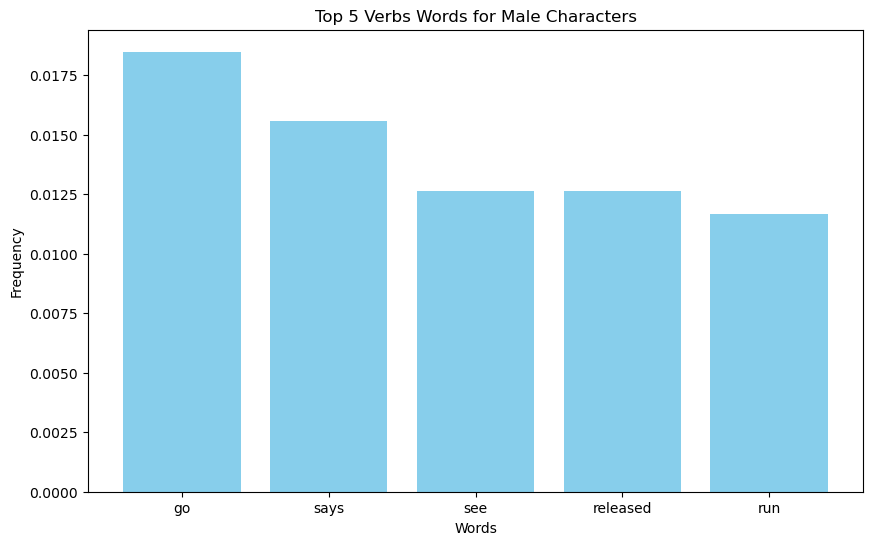

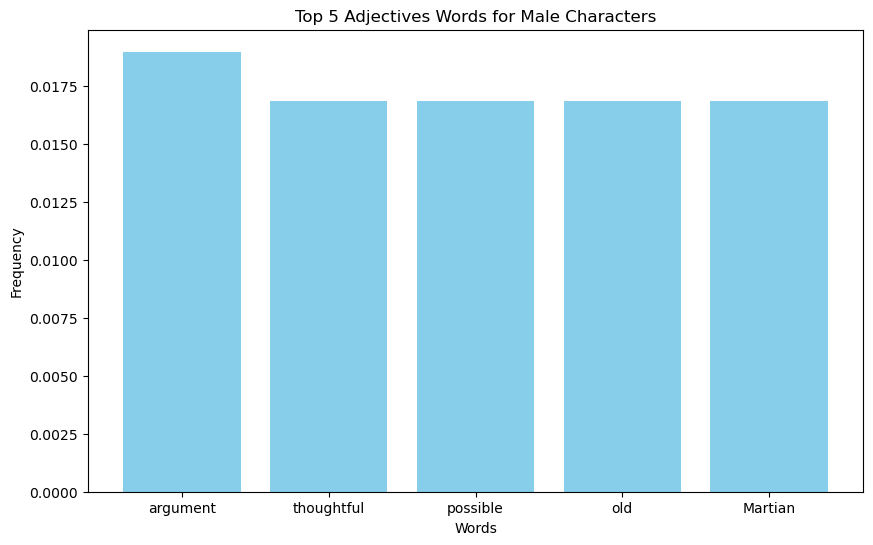

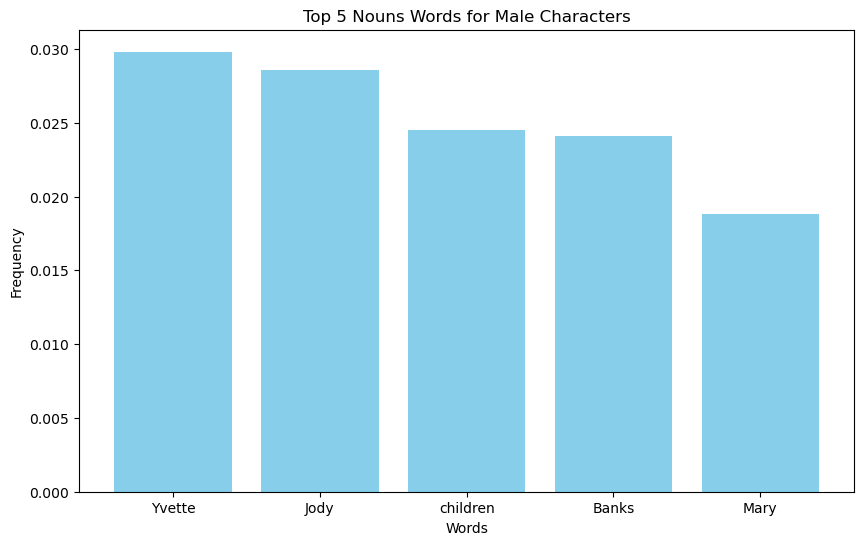

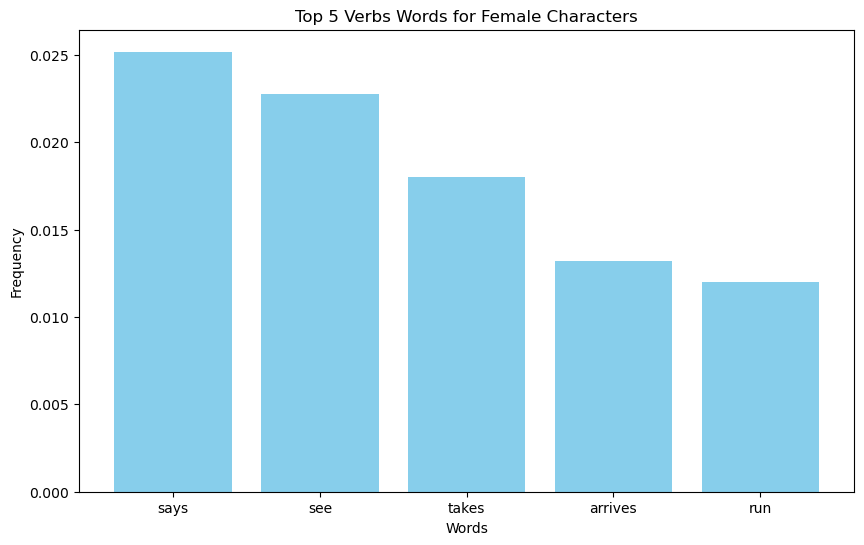

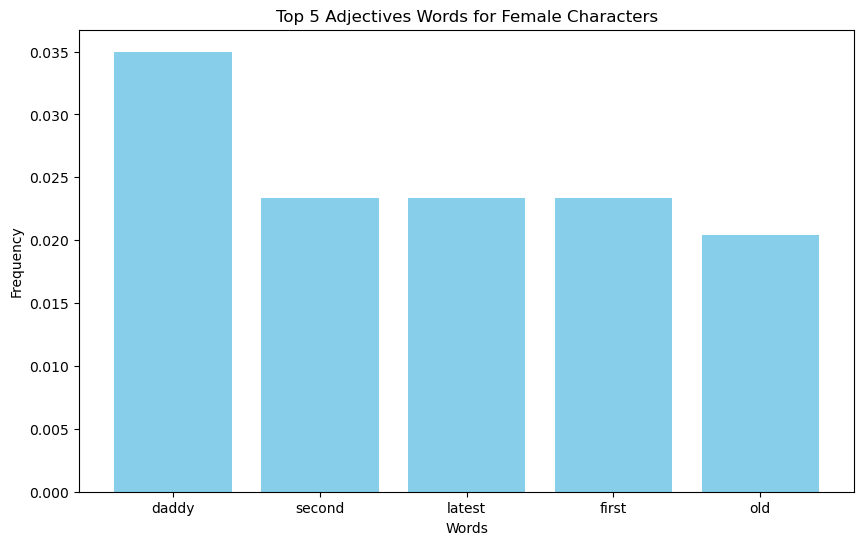

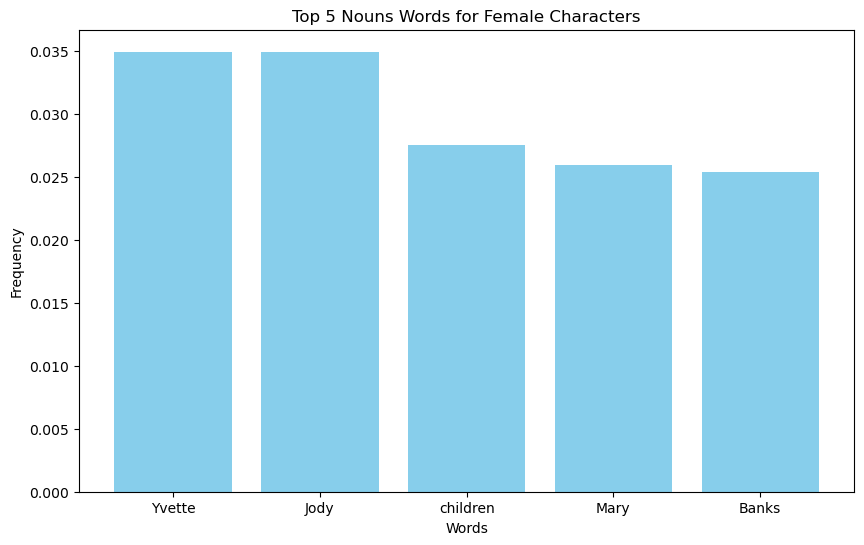

In [43]:
import matplotlib.pyplot as plt

def plot_top_words(frequencies, category, gender, top_n=5):
    words = list(frequencies[category].keys())
    values = list(frequencies[category].values())

    # Get the top N words and their frequencies
    top_words = [word for _, word in sorted(zip(values, words), reverse=True)[:top_n]]
    top_frequencies = [frequencies[category][word] for word in top_words]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_frequencies, color='skyblue')
    plt.title(f'Top 5 {category} Words for {gender} Characters')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Example usage:
# Assuming you have already obtained the male and female frequencies
# male_frequencies, female_frequencies = calculate_word_frequencies(male_dict), calculate_word_frequencies(female_dict)

# Plot the top 5 words for each category for male characters
for category in ['Verbs', 'Adjectives', 'Nouns']:
    plot_top_words(male_frequencies, category, 'Male')

# Plot the top 5 words for each category for female characters
for category in ['Verbs', 'Adjectives', 'Nouns']:
    plot_top_words(female_frequencies, category, 'Female')



## Testing code on full dataset

In [191]:
filtered_df = movie_noNA[movie_noNA['IMDB_ID'].isin(characters_noNA['IMDB_ID'])]
filtered_df

,IMDB_ID,wikipedia_ID,freebase_ID,box_office_revenue,runtime,name,release_date,genre,plot_summary
0,tt0228333,975900.0,/m/03vyhn,14010832.0,98.0,Ghosts of Mars,2001.0,"['Thriller', 'Adventure', 'Horror', 'Action', ...","Set in the second half of the 22nd century, th..."
5,tt0119548,6631279.0,/m/0gffwj,NaN,93.0,Little city,1997.0,"['Comedy', 'Romance Film', 'Drama', 'Romantic ...","Adam, a San Francisco-based artist who works a..."
6,tt0058331,77856.0,/m/0kcn7,102272727.0,139.0,Mary Poppins,1964.0,"['Musical', ""Children's/Family"", 'Drama', 'Com...",The film opens with Mary Poppins perched in a...
10,tt0892904,21926710.0,/m/05p45cv,NaN,82.0,White on Rice,2009.0,[],"[""Forty-year-old Jimmy is growing up--or at le..."
12,tt0255819,156558.0,/m/014k4y,29381649.0,123.0,Baby Boy,2001.0,"['Drama', 'Coming of age']",A young 20-year-old named Jody lives with his...
...,...,...,...,...,...,...,...,...,...
53602,tt9908448,NaN,NaN,NaN,NaN,The Bells of Hell,2018.0,[],['An alcoholic newlywed wife spends three days...
53603,tt9908592,NaN,NaN,NaN,NaN,Filmmakers Unite (FU),2017.0,[],"['Curated by Jay Rosenblatt and Ellen Bruno, F..."
53605,tt9910648,NaN,NaN,NaN,NaN,"The Good Americans: One Revolution, Two Nations",2021.0,[],['Størmerlige Films is making a feature-length...
53608,tt9913288,NaN,NaN,NaN,NaN,Letters,2020.0,[],"[""Charlie Porter is an ordinary man. He leads ..."


In [192]:
#verbs, adjs, nouns, chunks = extract_words_new(filtered_df)

In [193]:
# Create DataFrames from the lists
verbs_df = pd.DataFrame(verbs, columns=['IMDB_ID', 'Verbs'])
adjs_df = pd.DataFrame(adjs, columns=['IMDB_ID', 'Adjectives'])
nouns_df = pd.DataFrame(nouns, columns=['IMDB_ID', 'Nouns'])
chunks_df = pd.DataFrame(chunks, columns=['IMDB_ID', 'Chunks'])

merged_df = verbs_df.merge(adjs_df).merge(nouns_df).merge(chunks_df)

In [194]:
# Export as csv
merged_df.to_csv('DATA/words.csv', index=False)
# Export as pickle
merged_df.to_pickle('pickles/words.pickle')

In [195]:
merged_df=pd.read_pickle('pickles/words.pickle')

In [146]:
#output_characters_genders=find_characters_genders_for_all_movies(filtered_df, characters_noNA)

In [147]:
# Save output to csv
output_characters_genders.to_csv('DATA/output_characters_genders.csv', index=False)

NameError: name 'output_characters_genders' is not defined

In [ ]:
#Export as pickle
output_characters_genders.to_pickle('output_characters_genders/words.pickle')

In [ ]:
output_characters_genders

In [ ]:
count_gender = output_characters_genders['gender'].value_counts().to_dict()

print(
    "There are only {} movies left and with {} male characters and {} female characters.".format(
        len(output_characters_genders['IMDB_ID'].unique()), count_gender.get("M", 0), count_gender.get("F", 0)
    )
)

In [ ]:
output_characters_genders_context=extract_context_strings(output_characters_genders)

In [ ]:
# Save result as csv
output_characters_genders_context.to_csv('DATA/output_characters_genders_context.csv', index=False)

In [ ]:
# Save result as pickle
output_characters_genders_context.to_pickle('pickles/output_characters_genders_context.pickle')

In [44]:
# Load from csv
output_characters_genders_context=pd.read_csv('DATA/output_characters_genders_context.csv')

In [45]:
output_characters_genders_context

,IMDB_ID,plot_summary,character_name,gender,associated_words
0,tt0228333,"Set second half 22nd century, film depicts Mar...",Sgt Jericho Butler,M,second half 22nd humans walk surface wearing ...
1,tt0228333,"Set second half 22nd century, film depicts Mar...",Bashira Kincaid,F,pick transport prisoner Desolation Williams A...
2,tt0228333,"Set second half 22nd century, film depicts Mar...",Michael Descanso,M,Set second 22nd century film 22nd century fil...
3,tt0228333,"Set second half 22nd century, film depicts Mar...",Big Daddy Mars,M,century film depicts planet 84 terraformed
4,tt0228333,"Set second half 22nd century, film depicts Mar...",Akooshay,F,Set second 22nd century film miners discovere...
...,...,...,...,...,...
176329,tt9914522,"[""When Mackenzie Holden's sister brother law m...",Katelyn,F,NaN
176330,tt9914522,"[""When Mackenzie Holden's sister brother law m...",Kelsey,F,NaN
176331,tt9914522,"[""When Mackenzie Holden's sister brother law m...",Jade,F,honeymoon Mackenzie new Evan decision make ma...
176332,tt9914522,"[""When Mackenzie Holden's sister brother law m...",Evan,M,Mackenzie new husband decision make regarding


In [54]:
verbs_, adjs_ , nouns_, chunks_ = extract_words(output_characters_genders_context,
                                            "character_name","associated_words")

Processing Movies: 100%|██████████| 176334/176334 [18:35<00:00, 158.04it/s] 


In [64]:
adjs__df=pd.DataFrame(adjs_)
verbs__df=pd.DataFrame(verbs_)
nouns__df=pd.DataFrame(nouns_)
adjs__df.to_csv('DATA/adjs_df.csv', index=False)
verbs__df.to_csv('DATA/verbs_df.csv', index=False)
nouns__df.to_csv('DATA/nouns_df.csv', index=False)
chunks__df=pd.DataFrame(chunks_)
chunks__df.to_csv('DATA/chunks_df.csv', index=False)

In [56]:
verbs_df_final = pd.DataFrame(verbs_, columns=['character_name', 'Verbs'])
adjs_df_final = pd.DataFrame(adjs_, columns=['character_name', 'Adjectives'])
nouns_df_final = pd.DataFrame(nouns_, columns=['character_name', 'Nouns'])
chunks_df_final = pd.DataFrame(chunks_, columns=['character_name', 'Chunks'])

merged_df_final = verbs_df.merge(adjs_df_final).merge(nouns_df_final).merge(chunks_df_final)

In [58]:
merged_df_final

,character_name,Verbs,Adjectives,Nouns,Chunks
0,Sgt Jericho Butler,"[walk, wearing, sent, opened, released, posses...","[second, pick, disembodied, possible, Unfortun...","[half, humans, surface, pressure, suits, team,...","[(second, JJ), (half, NN), (22nd, CD), (humans..."
1,Bashira Kincaid,"[killed, returning, blame, cot, escapes, leaving]",[massacre],"[pick, transport, prisoner, Desolation, Willia...","[(pick, NN), (transport, NN), (prisoner, NN), ..."
2,Michael Descanso,"[planet, finds, missing, discovered, discovere...","[second, 22nd, 22nd, doorway, ancient, Martian...","[Set, century, film, century, film, Mars, mini...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
3,Big Daddy Mars,"[planet, terraformed]",[],"[century, film, depicts]","[(century, NN), (film, NN), (depicts, NNS), (p..."
4,Akooshay,"[discovered, created, wiped]","[second, 22nd, ancient, fierce]","[Set, century, film, miners, Martian, miners, ...","[[(Set, NNP)], (second, JJ), (22nd, JJ), (cent..."
...,...,...,...,...,...
45040982,Jewel,[Rose],[mysterious],"[letter, stalker, catalepsy, condition, condit...","[(found, VBN), (drug, NN), (attic, JJ), (prost..."
45040983,Jewel,[Rose],[mysterious],"[letter, stalker, catalepsy, condition, condit...","[(young, JJ), (couple, NN), [(Nathan, NNP)], (..."
45040984,Jewel,[Rose],[mysterious],"[letter, stalker, catalepsy, condition, condit...","[(part, NN), (true, JJ), (story, NN), (gospel,..."
45040985,Jewel,[Rose],[mysterious],"[letter, stalker, catalepsy, condition, condit...","[(father, RB), (introduced, VBN), (intriguing,..."


In [59]:
# Export as csv
merged_df_final.to_csv('DATA/final.csv', index=False)
# Export as pickle
#merged_df_final.to_pickle('pickles/final.pickle')

KeyboardInterrupt: 

In [ ]:
final_df = pd.merge(characters_data, merged_df_final, on='character_name', how='left')